In [ ]:
!pip install astroNN

     |████████████████████████████████| 9.3 MB 4.5 MB/s 
     |████████████████████████████████| 4.5 MB 40.7 MB/s 
     |████████████████████████████████| 802 kB 42.9 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.6 MB 29.1 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284594 sha256=40bb676451dea09f4becd1a839e4dabfc64990af968b338c7442af376a4f51cc
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=2c3b30baec9f4fcfd3ef3bf032e1535f5579ba3dffa80bab296680832d6bc370
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built astroNN mimeparse


## LOAD DATA

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
with h5py.File('./gdrive/MyDrive/Datasets/Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# convert labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# convert to desirable type
# labels = labels.astype(np.float32)
# images = images.astype(np.float32)

# split into train and test set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

In [ ]:
print(train_images[0].shape)

In [ ]:

plt.imshow(train_images[0])
plt.show()

## BUILD MODEL

In [ ]:
model = Sequential()

# add layers
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model
history_1 = model.fit(train_images, train_labels, batch_size=32, validation_data=(test_images, test_labels), epochs=6)
model.save('./gdrive/MyDrive/Models/Astronomy')

Epoch 1/6
499/499 [==============================] - 131s 237ms/step - loss: 2.0765 - accuracy: 0.2171 - val_loss: 1.5788 - val_accuracy: 0.3929
Epoch 2/6
499/499 [==============================] - 116s 232ms/step - loss: 1.4536 - accuracy: 0.4655 - val_loss: 1.2722 - val_accuracy: 0.5406
Epoch 3/6
499/499 [==============================] - 114s 228ms/step - loss: 1.1771 - accuracy: 0.5813 - val_loss: 1.1553 - val_accuracy: 0.5958
Epoch 4/6
499/499 [==============================] - 113s 227ms/step - loss: 0.9917 - accuracy: 0.6480 - val_loss: 1.0365 - val_accuracy: 0.6612
Epoch 5/6
499/499 [==============================] - 120s 241ms/step - loss: 0.8668 - accuracy: 0.6945 - val_loss: 0.9889 - val_accuracy: 0.6657
Epoch 6/6
499/499 [==============================] - 116s 232ms/step - loss: 0.7531 - accuracy: 0.7356 - val_loss: 0.9881 - val_accuracy: 0.6725
INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Models/Astronomy/assets


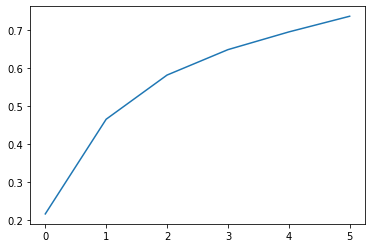

In [ ]:
plt.plot(history_1.history['accuracy'])

In [ ]:
model = load_model('./gdrive/MyDrive/Models/Astronomy')
history_2 = model.fit(train_images, train_labels, batch_size=32, validation_data=(test_images, test_labels), epochs=6)

Epoch 1/6
499/499 [==============================] - 2789s 6s/step - loss: 0.6723 - accuracy: 0.7716 - val_loss: 0.7136 - val_accuracy: 0.7463
Epoch 2/6
499/499 [==============================] - 2794s 6s/step - loss: 0.5544 - accuracy: 0.8098 - val_loss: 0.6905 - val_accuracy: 0.7570
Epoch 3/6
499/499 [==============================] - 2801s 6s/step - loss: 0.4550 - accuracy: 0.8407 - val_loss: 0.8343 - val_accuracy: 0.7294
Epoch 4/6
499/499 [==============================] - 2811s 6s/step - loss: 0.3730 - accuracy: 0.8720 - val_loss: 0.7538 - val_accuracy: 0.7683
Epoch 5/6
499/499 [==============================] - 2822s 6s/step - loss: 0.2955 - accuracy: 0.9005 - val_loss: 0.9688 - val_accuracy: 0.7339
Epoch 6/6
499/499 [==============================] - 2836s 6s/step - loss: 0.2520 - accuracy: 0.9161 - val_loss: 0.9416 - val_accuracy: 0.7503


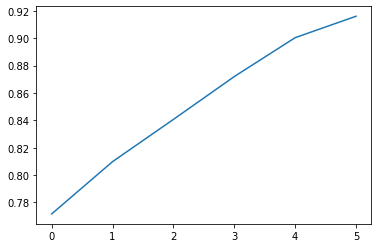

In [ ]:
plt.plot(history_2.history['accuracy'])

In [ ]:
model.save('./gdrive/MyDrive/Models/Astronomy')

INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Models/Astronomy/assets
